In [8]:
# Cell 1: Imports
%pip install pandas matplotlib seaborn numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 23.3.1 -> 26.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
# Cell 2: Load data
df = pd.read_csv('../data/Motor_Vehicle_Collisions.csv')

print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"📊 Total records: {len(df):,}")
print(f"📋 Total columns: {df.shape[1]}")
print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print()

DATASET OVERVIEW
📊 Total records: 375,025
📋 Total columns: 29
💾 Memory usage: 392.52 MB



In [10]:
# Cell 3: First rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,02/03/2022,16:15,QUEENS,11360.0,"40,776665","-73,78281","(40.776665, -73.78281)",KENNEDY STREET,26 AVENUE,NaN,...,NaN,NaN,NaN,NaN,4500092,NaN,NaN,NaN,NaN,NaN
1,02/03/2022,18:51,MANHATTAN,10036.0,"40,763428","-73,99271","(40.763428, -73.99271)",WEST 48 STREET,10 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4504654,Sedan,Bike,NaN,NaN,NaN
2,02/03/2022,22:50,QUEENS,11385.0,"40,695114","-73,90322","(40.695114, -73.90322)",WYCKOFF AVENUE,NORMAN STREET,NaN,...,NaN,NaN,NaN,NaN,4504817,Pick-up Truck,NaN,NaN,NaN,NaN
3,02/03/2022,5:00,QUEENS,11365.0,NaN,NaN,NaN,167 STREET,69 AVENUE,NaN,...,NaN,NaN,NaN,NaN,4505158,Sedan,NaN,NaN,NaN,NaN
4,02/03/2022,2:34,MANHATTAN,10002.0,"40,71504","-73,99681","(40.71504, -73.99681)",BOWERY,BAYARD STREET,NaN,...,Unspecified,NaN,NaN,NaN,4499478,Tow Truck / Wrecker,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [11]:
# Cell 4: Column names
print("Column names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2}. {col}")

Column names:
 1. CRASH DATE
 2. CRASH TIME
 3. BOROUGH
 4. ZIP CODE
 5. LATITUDE
 6. LONGITUDE
 7. LOCATION
 8. ON STREET NAME
 9. CROSS STREET NAME
10. OFF STREET NAME
11. NUMBER OF PERSONS INJURED
12. NUMBER OF PERSONS KILLED
13. NUMBER OF PEDESTRIANS INJURED
14. NUMBER OF PEDESTRIANS KILLED
15. NUMBER OF CYCLIST INJURED
16. NUMBER OF CYCLIST KILLED
17. NUMBER OF MOTORIST INJURED
18. NUMBER OF MOTORIST KILLED
19. CONTRIBUTING FACTOR VEHICLE 1
20. CONTRIBUTING FACTOR VEHICLE 2
21. CONTRIBUTING FACTOR VEHICLE 3
22. CONTRIBUTING FACTOR VEHICLE 4
23. CONTRIBUTING FACTOR VEHICLE 5
24. COLLISION_ID
25. VEHICLE TYPE CODE 1
26. VEHICLE TYPE CODE 2
27. VEHICLE TYPE CODE 3
28. VEHICLE TYPE CODE 4
29. VEHICLE TYPE CODE 5


In [12]:
# Cell 5: Data types info
print("="*60)
print("DATA TYPES & NON-NULL COUNTS")
print("="*60)
df.info()

DATA TYPES & NON-NULL COUNTS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375025 entries, 0 to 375024
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH DATE                     375025 non-null  object 
 1   CRASH TIME                     375025 non-null  object 
 2   BOROUGH                        267474 non-null  object 
 3   ZIP CODE                       267418 non-null  float64
 4   LATITUDE                       351329 non-null  object 
 5   LONGITUDE                      351329 non-null  object 
 6   LOCATION                       351329 non-null  object 
 7   ON STREET NAME                 268124 non-null  object 
 8   CROSS STREET NAME              193166 non-null  object 
 9   OFF STREET NAME                106897 non-null  object 
 10  NUMBER OF PERSONS INJURED      375025 non-null  int64  
 11  NUMBER OF PERSONS KILLED       375025 non-null  int64  
 12  N

In [13]:
# Cell 6: Missing values analysis
print("="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing Count': missing.values,
    'Percentage': missing_pct.values
}).sort_values('Percentage', ascending=False)

# Show only columns with missing values
missing_with_nulls = missing_df[missing_df['Percentage'] > 0]
print(missing_with_nulls.to_string(index=False))

MISSING VALUES ANALYSIS
                       Column  Missing Count  Percentage
          VEHICLE TYPE CODE 5         372518   99.331511
CONTRIBUTING FACTOR VEHICLE 5         372404   99.301113
          VEHICLE TYPE CODE 4         366687   97.776682
CONTRIBUTING FACTOR VEHICLE 4         366203   97.647623
          VEHICLE TYPE CODE 3         343861   91.690154
CONTRIBUTING FACTOR VEHICLE 3         341444   91.045664
              OFF STREET NAME         268128   71.496034
            CROSS STREET NAME         181859   48.492500
          VEHICLE TYPE CODE 2         126999   33.864142
                     ZIP CODE         107607   28.693287
                      BOROUGH         107551   28.678355
               ON STREET NAME         106901   28.505033
CONTRIBUTING FACTOR VEHICLE 2          89148   23.771215
                     LOCATION          23696    6.318512
                    LONGITUDE          23696    6.318512
                     LATITUDE          23696    6.318512
       

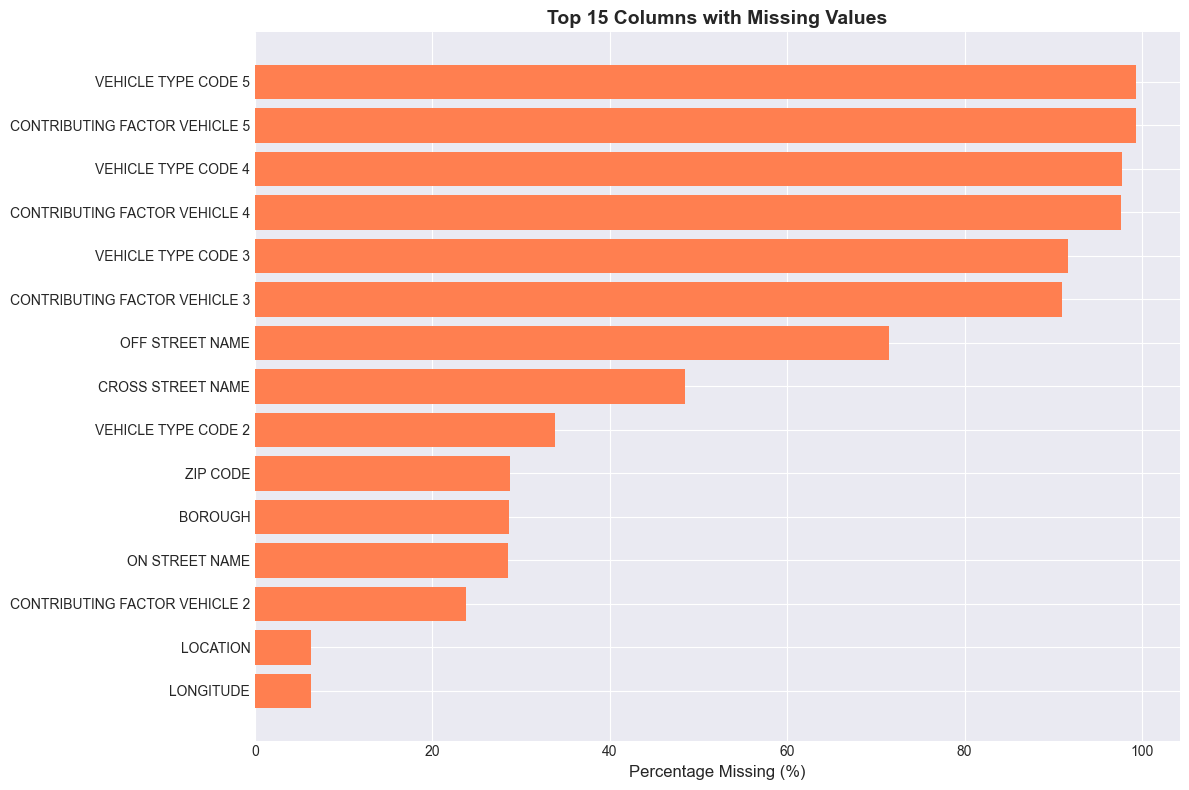

In [14]:
# Cell 7: Visualize missing values
plt.figure(figsize=(12, 8))
top_missing = missing_df[missing_df['Percentage'] > 0].head(15)
plt.barh(top_missing['Column'], top_missing['Percentage'], color='coral')
plt.xlabel('Percentage Missing (%)', fontsize=12)
plt.title('Top 15 Columns with Missing Values', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [15]:
# Cell 8: Prepare temporal data
# Convert date and time
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], errors='coerce')
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M', errors='coerce')

# Extract components
df['year'] = df['CRASH DATE'].dt.year
df['month'] = df['CRASH DATE'].dt.month
df['day_of_week'] = df['CRASH DATE'].dt.dayofweek
df['hour'] = df['CRASH TIME'].dt.hour

print("✅ Temporal features extracted")
print(f"Date range: {df['CRASH DATE'].min()} to {df['CRASH DATE'].max()}")

✅ Temporal features extracted
Date range: 2022-02-03 00:00:00 to 2026-01-30 00:00:00


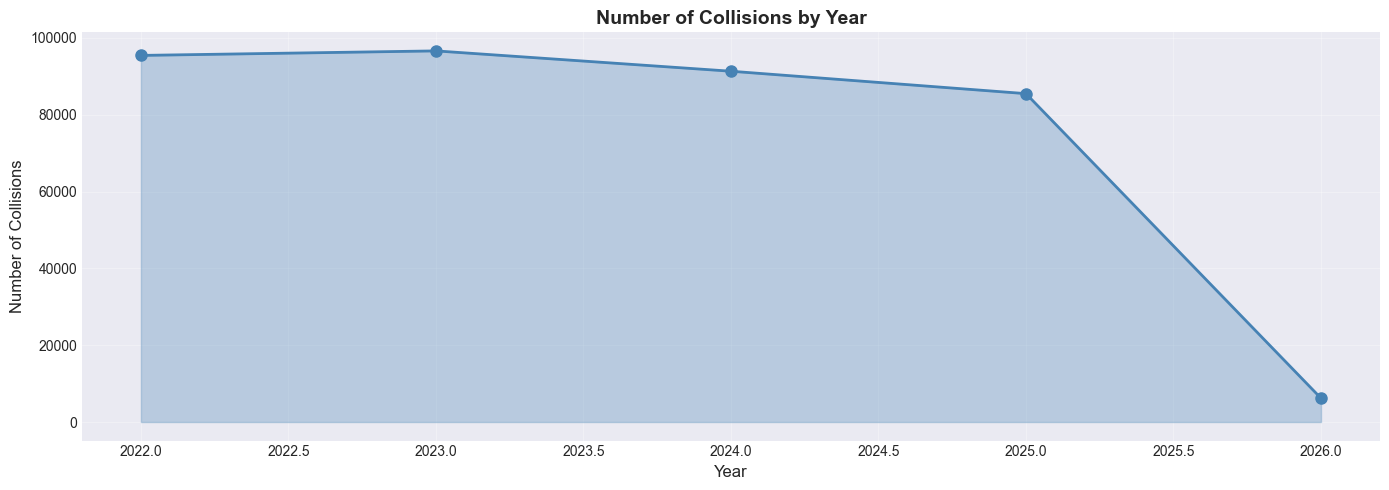

Peak year: 2023 with 96,607 collisions


In [16]:
# Cell 9: Collisions by year
plt.figure(figsize=(14, 5))
yearly = df['year'].value_counts().sort_index()
plt.plot(yearly.index, yearly.values, marker='o', linewidth=2, markersize=8, color='steelblue')
plt.fill_between(yearly.index, yearly.values, alpha=0.3, color='steelblue')
plt.title('Number of Collisions by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Collisions', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Peak year: {yearly.idxmax()} with {yearly.max():,} collisions")

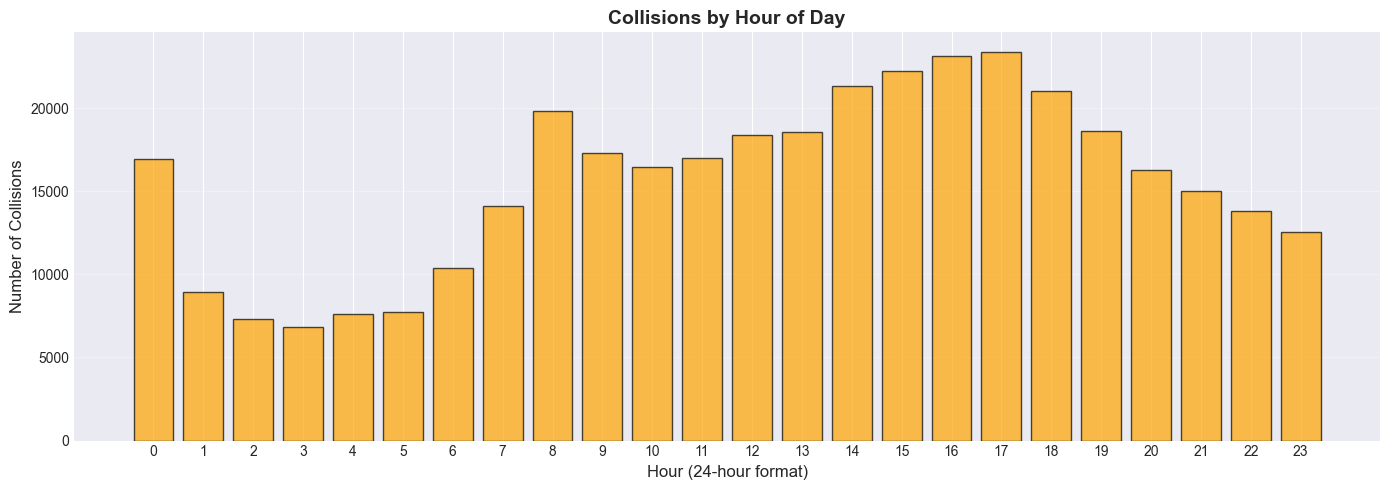

Peak hour: 17:00 with 23,411 collisions
Safest hour: 3:00 with 6,818 collisions


In [17]:
# Cell 10: Collisions by hour of day
plt.figure(figsize=(14, 5))
hourly = df['hour'].value_counts().sort_index()
plt.bar(hourly.index, hourly.values, color='orange', alpha=0.7, edgecolor='black')
plt.title('Collisions by Hour of Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour (24-hour format)', fontsize=12)
plt.ylabel('Number of Collisions', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Peak hour: {hourly.idxmax()}:00 with {hourly.max():,} collisions")
print(f"Safest hour: {hourly.idxmin()}:00 with {hourly.min():,} collisions")

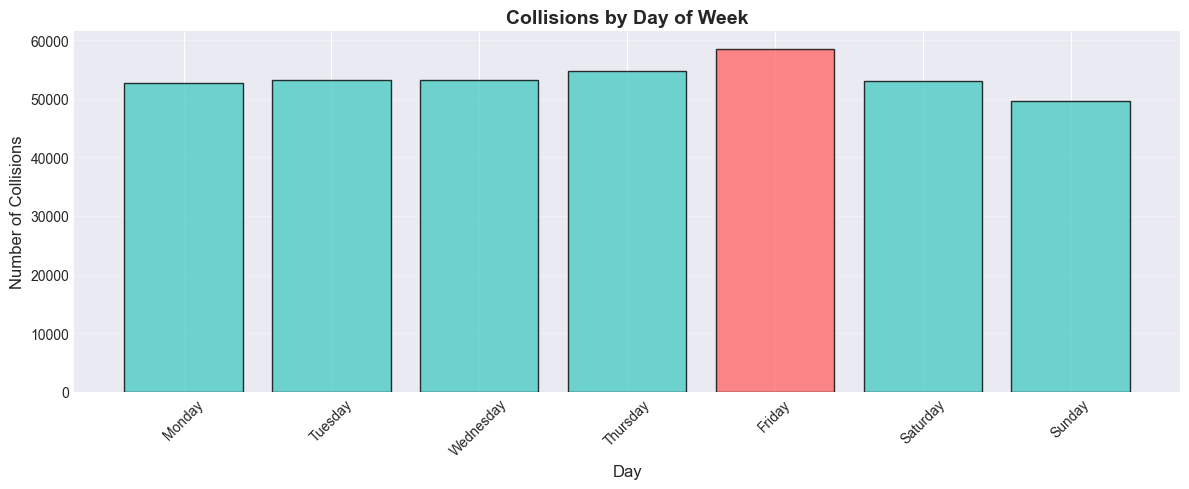

Most dangerous day: Friday with 58,561 collisions


In [18]:
# Cell 11: Collisions by day of week
days_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 5))
daily = df['day_of_week'].value_counts().sort_index()
colors = ['#FF6B6B' if i == daily.idxmax() else '#4ECDC4' for i in daily.index]
plt.bar(range(7), daily.values, color=colors, edgecolor='black', alpha=0.8)
plt.title('Collisions by Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Number of Collisions', fontsize=12)
plt.xticks(range(7), days_names, rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Most dangerous day: {days_names[daily.idxmax()]} with {daily.max():,} collisions")

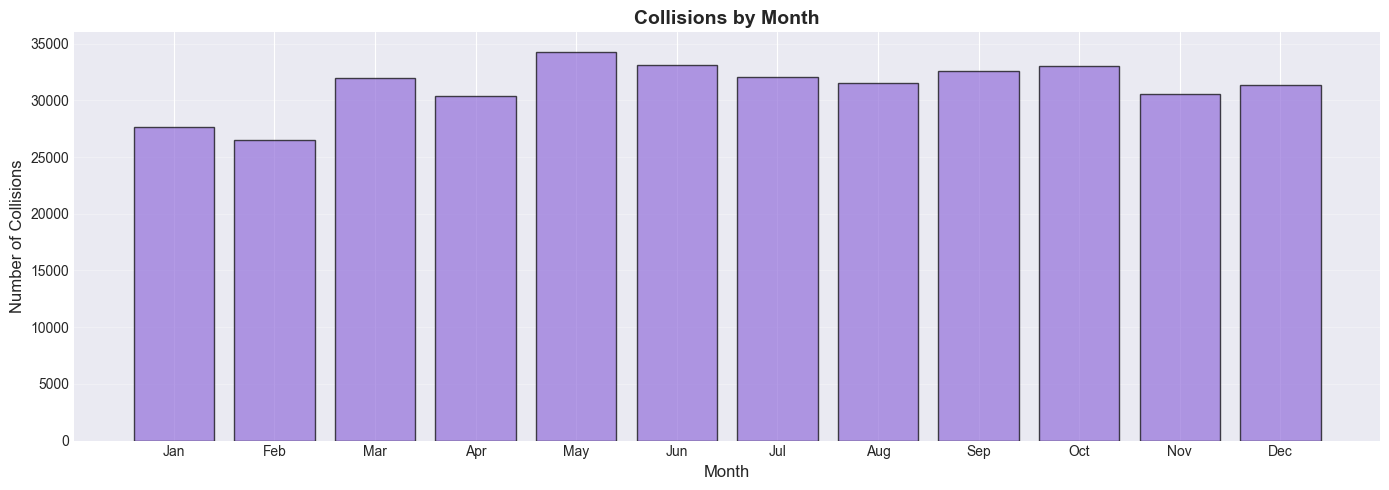

Peak month: May with 34,287 collisions


In [19]:
# Cell 12: Collisions by month
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(14, 5))
monthly = df['month'].value_counts().sort_index()
plt.bar(range(1, 13), monthly.values, color='mediumpurple', alpha=0.7, edgecolor='black')
plt.title('Collisions by Month', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Collisions', fontsize=12)
plt.xticks(range(1, 13), month_names)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Peak month: {month_names[monthly.idxmax()-1]} with {monthly.max():,} collisions")

In [20]:
# Cell 13: Borough analysis
print("="*60)
print("SPATIAL ANALYSIS - BOROUGHS")
print("="*60)

borough_counts = df['BOROUGH'].value_counts()
print(borough_counts)
print(f"\nMissing borough info: {df['BOROUGH'].isna().sum():,} ({df['BOROUGH'].isna().sum()/len(df)*100:.1f}%)")

SPATIAL ANALYSIS - BOROUGHS
BOROUGH
BROOKLYN         93151
QUEENS           71687
MANHATTAN        48948
BRONX            42789
STATEN ISLAND    10899
Name: count, dtype: int64

Missing borough info: 107,551 (28.7%)


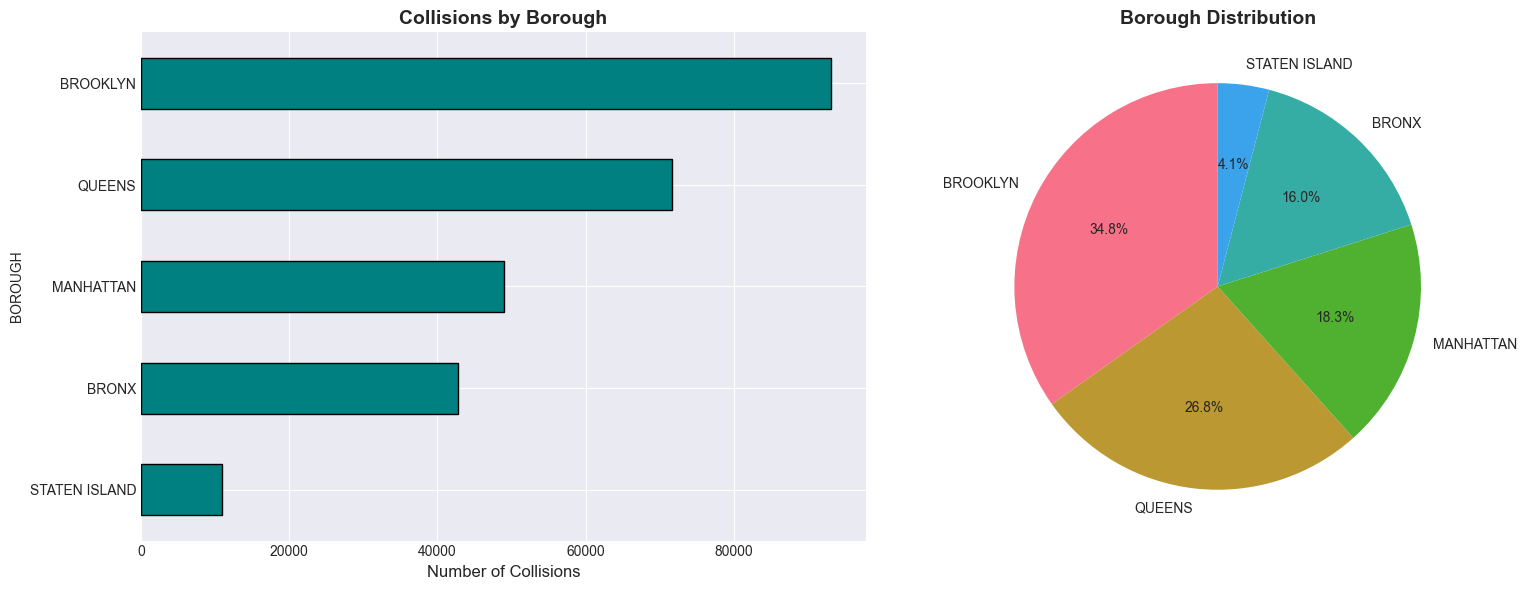

In [21]:
# Cell 14: Borough visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
borough_counts.plot(kind='barh', ax=axes[0], color='teal', edgecolor='black')
axes[0].set_title('Collisions by Borough', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Collisions', fontsize=12)
axes[0].invert_yaxis()

# Pie chart
borough_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Borough Distribution', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [22]:
# Cell 15: Coordinates analysis
print("="*60)
print("LOCATION COORDINATES ANALYSIS")
print("="*60)

has_coords = df[['LATITUDE', 'LONGITUDE']].notna().all(axis=1)
print(f"✅ Records WITH coordinates: {has_coords.sum():,} ({has_coords.sum()/len(df)*100:.1f}%)")
print(f"❌ Records WITHOUT coordinates: {(~has_coords).sum():,} ({(~has_coords).sum()/len(df)*100:.1f}%)")

LOCATION COORDINATES ANALYSIS
✅ Records WITH coordinates: 351,329 (93.7%)
❌ Records WITHOUT coordinates: 23,696 (6.3%)


In [22]:
# Cell 16: Collision map (sample for speed)
df_coords = df.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Take random sample for visualization (otherwise too slow)
sample_size = min(50000, len(df_coords))
df_sample = df_coords.sample(n=sample_size, random_state=42)

plt.figure(figsize=(12, 12))
plt.scatter(df_sample['LONGITUDE'], 
            df_sample['LATITUDE'], 
            alpha=0.05, 
            s=1, 
            c='red')
plt.title(f'NYC Collision Locations (Sample of {sample_size:,} records)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

KeyboardInterrupt: 

In [ ]:
# Cell 17: Injury and fatality statistics
injury_cols = [
    'NUMBER OF PERSONS INJURED', 
    'NUMBER OF PERSONS KILLED',
    'NUMBER OF PEDESTRIANS INJURED', 
    'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST INJURED', 
    'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST INJURED', 
    'NUMBER OF MOTORIST KILLED'
]

print("="*60)
print("INJURY & FATALITY STATISTICS")
print("="*60)
print(df[injury_cols].describe())

In [28]:
# Cell 18: Create severity category
# Create severity category
df['total_injured'] = df['NUMBER OF PERSONS INJURED']
df['total_killed'] = df['NUMBER OF PERSONS KILLED']

df['severity'] = 'Property Damage Only'
df.loc[df['total_injured'] > 0, 'severity'] = 'Injury'
df.loc[df['total_killed'] > 0, 'severity'] = 'Fatal'

severity_counts = df['severity'].value_counts()
print("="*60)
print("COLLISION SEVERITY DISTRIBUTION")
print("="*60)
print(severity_counts)
print()
print("Percentages:")
print((severity_counts / len(df) * 100).round(2))

COLLISION SEVERITY DISTRIBUTION
severity
Property Damage Only    217750
Injury                  156272
Fatal                     1003
Name: count, dtype: int64

Percentages:
severity
Property Damage Only    58.06
Injury                  41.67
Fatal                    0.27
Name: count, dtype: float64


In [ ]:
# Cell 19: Severity visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart
colors_severity = ['#90EE90', '#FFD700', '#FF6B6B']
severity_counts.plot(kind='pie', ax=axes[0], autopct='%1.2f%%', 
                     colors=colors_severity, startangle=90)
axes[0].set_title('Collision Severity Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('')

# Bar chart
severity_counts.plot(kind='bar', ax=axes[1], color=colors_severity, edgecolor='black')
axes[1].set_title('Collision Count by Severity', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number of Collisions', fontsize=12)
axes[1].set_xticklabels(severity_counts.index, rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Cell 20: Severity by road user type
injury_by_type = pd.DataFrame({
    'Pedestrians Injured': df['NUMBER OF PEDESTRIANS INJURED'].sum(),
    'Cyclists Injured': df['NUMBER OF CYCLIST INJURED'].sum(),
    'Motorists Injured': df['NUMBER OF MOTORIST INJURED'].sum(),
    'Pedestrians Killed': df['NUMBER OF PEDESTRIANS KILLED'].sum(),
    'Cyclists Killed': df['NUMBER OF CYCLIST KILLED'].sum(),
    'Motorists Killed': df['NUMBER OF MOTORIST KILLED'].sum()
}, index=[0]).T

print("="*60)
print("CASUALTIES BY ROAD USER TYPE")
print("="*60)
print(injury_by_type)

plt.figure(figsize=(12, 6))
injury_by_type.plot(kind='barh', legend=False, color=['orange', 'orange', 'orange', 'red', 'red', 'red'])
plt.title('Total Casualties by Road User Type', fontsize=14, fontweight='bold')
plt.xlabel('Total Count', fontsize=12)
plt.tight_layout()
plt.show()

In [23]:
# Cell 21: Top contributing factors
print("="*60)
print("TOP CONTRIBUTING FACTORS")
print("="*60)

factor_col = 'CONTRIBUTING FACTOR VEHICLE 1'
top_factors = df[factor_col].value_counts().head(15)
print(top_factors)

TOP CONTRIBUTING FACTORS
CONTRIBUTING FACTOR VEHICLE 1
Driver Inattention/Distraction    92484
Unspecified                       92059
Failure to Yield Right-of-Way     25839
Following Too Closely             22766
Passing or Lane Usage Improper    16019
Unsafe Speed                      13479
Passing Too Closely               12803
Other Vehicular                   11720
Backing Unsafely                  11318
Traffic Control Disregarded       10493
Turning Improperly                 8712
Driver Inexperience                7896
Unsafe Lane Changing               7676
Alcohol Involvement                6923
Reaction to Uninvolved Vehicle     4328
Name: count, dtype: int64
ERROR! Session/line number was not unique in database. History logging moved to new session 144


TOP CONTRIBUTING FACTORS ACROSS ALL VEHICLES
Unspecified                                              374186
Driver Inattention/Distraction                           109793
Failure to Yield Right-of-Way                             28261
Following Too Closely                                     27929
Passing or Lane Usage Improper                            18826
Other Vehicular                                           17550
Unsafe Speed                                              15861
Passing Too Closely                                       14511
Traffic Control Disregarded                               12287
Backing Unsafely                                          11982
Turning Improperly                                         9613
Driver Inexperience                                        9213
Unsafe Lane Changing                                       8851
Alcohol Involvement                                        7317
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion      

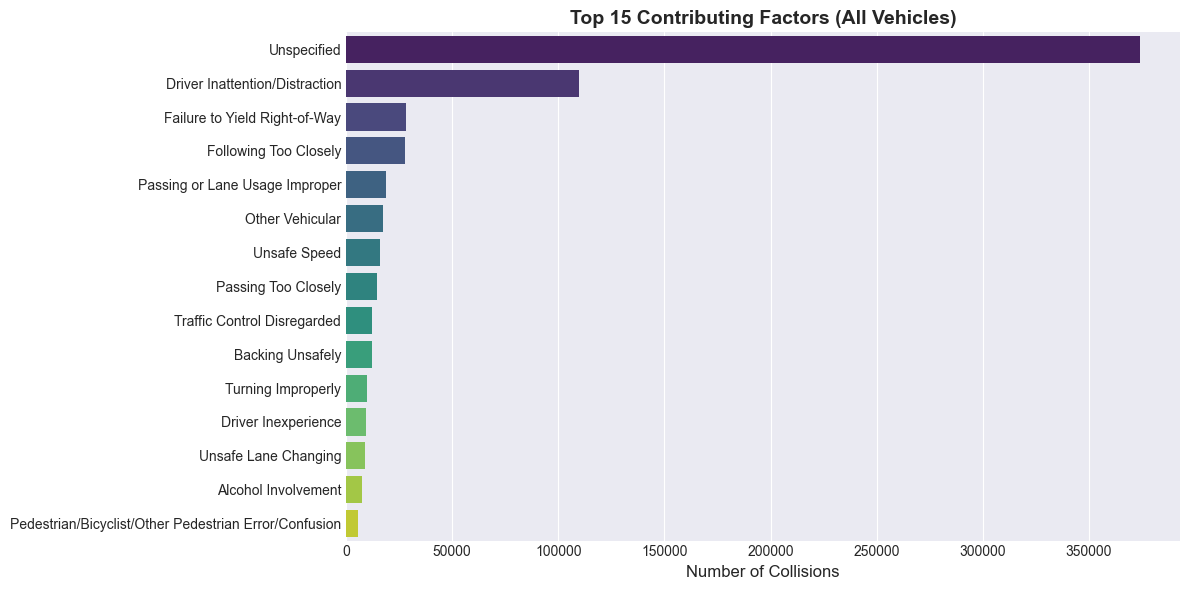

In [24]:
#Cell 22: Top contributing factors of all collisions for all vehicles

factor_cols = [f'CONTRIBUTING FACTOR VEHICLE {i}' for i in range(1,6)]

# Flatten all factor columns and count occurrences
all_factors = pd.Series(df[factor_cols].values.ravel()).value_counts()

# Remove NaNs
all_factors = all_factors.dropna()

# Top 15 factors overall
top_all_factors = all_factors.head(15)

print("="*60)
print("TOP CONTRIBUTING FACTORS ACROSS ALL VEHICLES")
print("="*60)
print(top_all_factors)

# Visualization
plt.figure(figsize=(12,6))
sns.barplot(x=top_all_factors.values, y=top_all_factors.index, palette="viridis")
plt.title('Top 15 Contributing Factors (All Vehicles)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Collisions', fontsize=12)
plt.ylabel('')
plt.tight_layout()
plt.show()


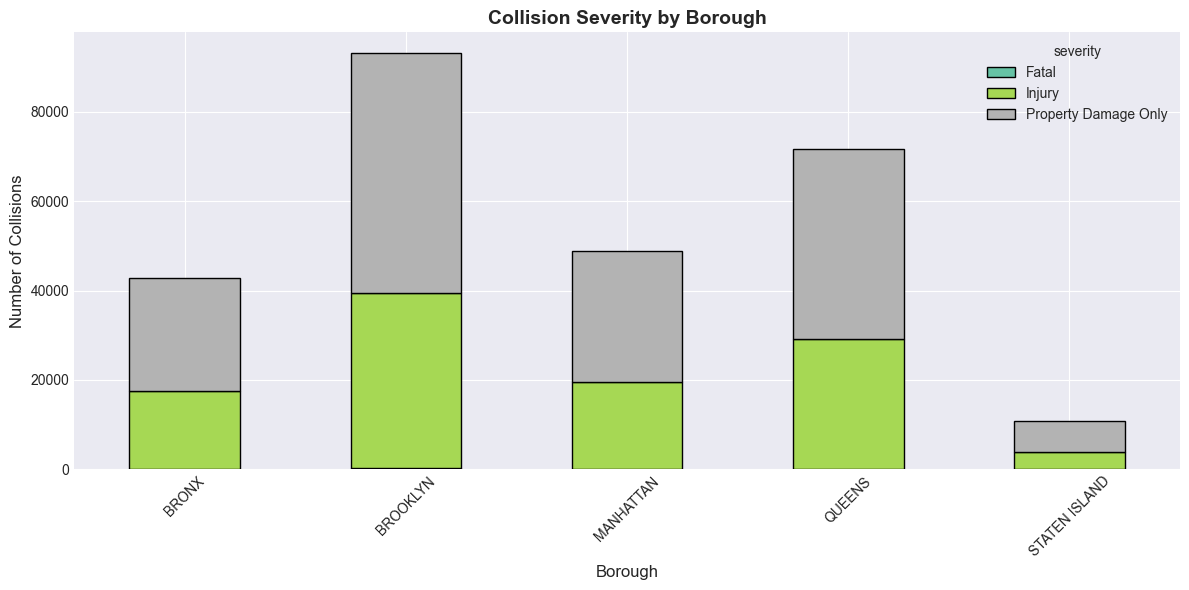

severity       Fatal  Injury  Property Damage Only
BOROUGH                                           
BRONX           0.25   40.80                 58.95
BROOKLYN        0.22   42.15                 57.63
MANHATTAN       0.22   39.61                 60.17
QUEENS          0.20   40.46                 59.35
STATEN ISLAND   0.25   36.17                 63.58


In [29]:
#Cell 23: Collision severity/type across the different boroughs
# Strip all column names
df.columns = df.columns.str.strip()

severity_borough = pd.crosstab(df['BOROUGH'], df['severity'])

# Plot stacked bar chart
severity_borough.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2', edgecolor='black')
plt.title('Collision Severity by Borough', fontsize=14, fontweight='bold')
plt.ylabel('Number of Collisions', fontsize=12)
plt.xlabel('Borough', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Percentages
severity_borough_pct = severity_borough.div(severity_borough.sum(axis=1), axis=0) * 100
print(severity_borough_pct.round(2))


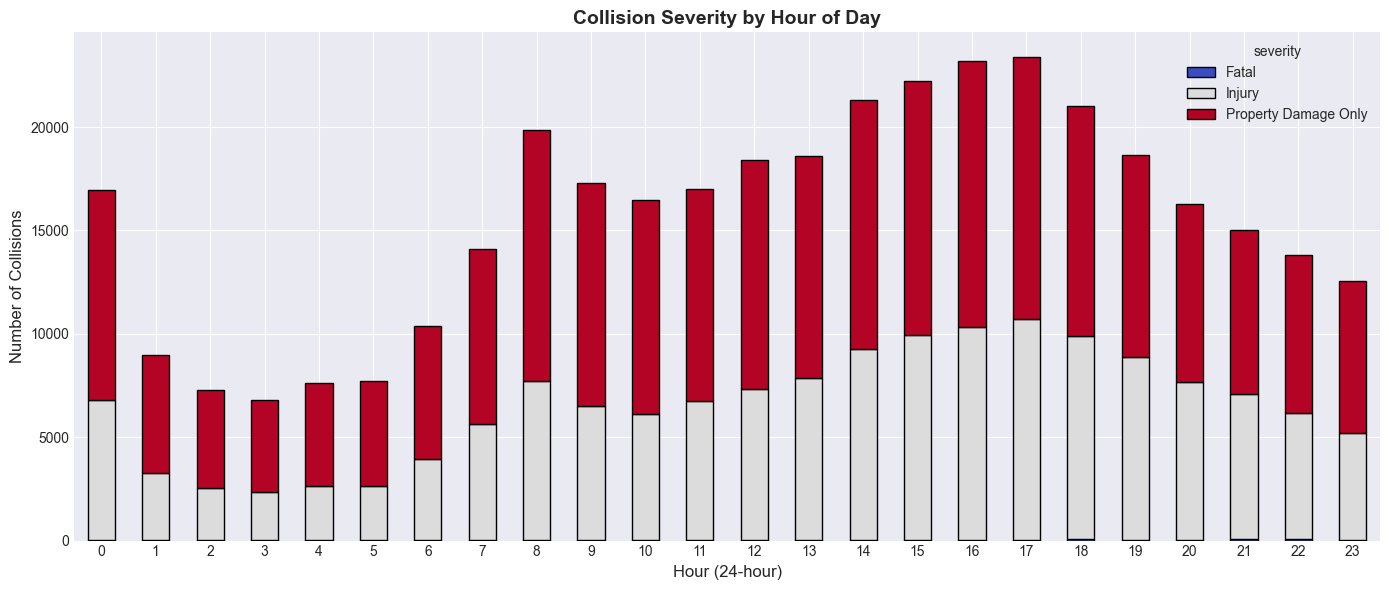

In [30]:
#Cell 24: Collisions and type of them over different hours of the day
severity_hour = pd.crosstab(df['hour'], df['severity']).sort_index()

# Plot stacked bar chart
severity_hour.plot(kind='bar', stacked=True, figsize=(14,6), colormap='coolwarm', edgecolor='black')
plt.title('Collision Severity by Hour of Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour (24-hour)', fontsize=12)
plt.ylabel('Number of Collisions', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [32]:
#Cell 25: Heatmap of the collisions across NYC
import folium
from folium.plugins import HeatMap

# Random sampled data (limited for speed, but can be altered)
df_map = df.dropna(subset=['LATITUDE','LONGITUDE']).sample(n=min(50000, len(df)), random_state=42)

# Center map at NYC
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

#Executing the heap map
heat_data = df_map[['LATITUDE','LONGITUDE']].values.tolist()
HeatMap(heat_data, radius=7, blur=15, min_opacity=0.3).add_to(nyc_map)

# Display map
nyc_map


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 7.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 26.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


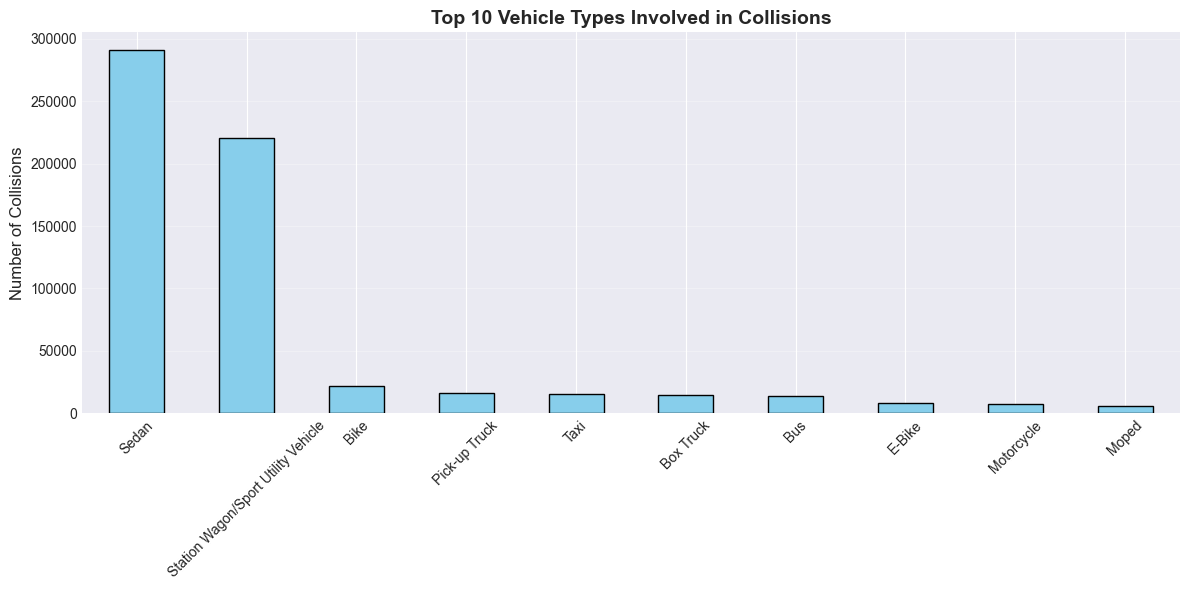

Sedan                                  290448
Station Wagon/Sport Utility Vehicle    220537
Bike                                    22087
Pick-up Truck                           16762
Taxi                                    15585
Box Truck                               14612
Bus                                     13899
E-Bike                                   8275
Motorcycle                               7689
Moped                                    6341
Name: count, dtype: int64


In [33]:
#Cell 26: Vehicles involved in Collisions Visualization
vehicle_cols = [f'VEHICLE TYPE CODE {i}' for i in range(1,6)]
all_vehicles = pd.Series(df[vehicle_cols].values.ravel()).value_counts().head(10)

plt.figure(figsize=(12,6))
all_vehicles.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Vehicle Types Involved in Collisions', fontsize=14, fontweight='bold')
plt.ylabel('Number of Collisions', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(all_vehicles)


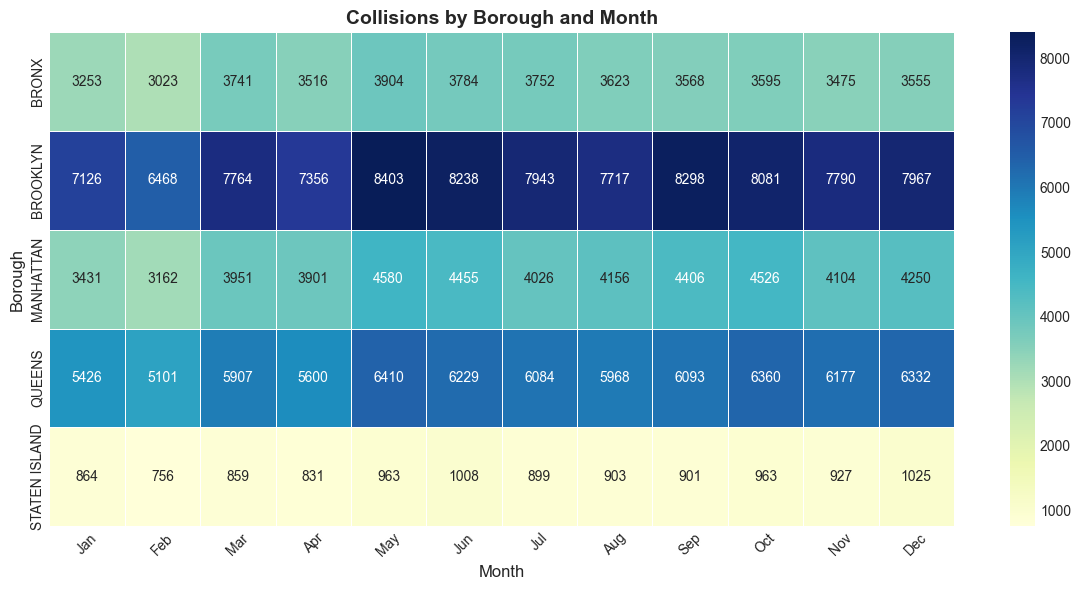

In [35]:
#Cell 27: Heatmap of the collisions by boroughs across NYC by month
borough_month = df.pivot_table(index='BOROUGH', columns='month', values='COLLISION_ID', aggfunc='count', fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(borough_month, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Collisions by Borough and Month', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Borough', fontsize=12)
plt.xticks(ticks=np.arange(12)+0.5, labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=45)
plt.tight_layout()
plt.show()


In [36]:
#Cell 28: Why Collisions across NYC Boroughs 
factor_cols = [f'CONTRIBUTING FACTOR VEHICLE {i}' for i in range(1,6)]
boroughs = df['BOROUGH'].dropna().unique()

top_factors_borough = {}

for b in boroughs:
    subset = df[df['BOROUGH'] == b]
    factors = pd.Series(subset[factor_cols].values.ravel()).dropna()
    top_factors_borough[b] = factors.value_counts().head(3)  # top 3 factors per borough

for b, top in top_factors_borough.items():
    print(f"\nTop Contributing Factors in {b}:")
    print(top)



Top Contributing Factors in QUEENS:
Unspecified                       71718
Driver Inattention/Distraction    20738
Failure to Yield Right-of-Way      7780
Name: count, dtype: int64

Top Contributing Factors in MANHATTAN:
Unspecified                       43698
Driver Inattention/Distraction    16334
Failure to Yield Right-of-Way      3198
Name: count, dtype: int64

Top Contributing Factors in BROOKLYN:
Unspecified                       100144
Driver Inattention/Distraction     26740
Failure to Yield Right-of-Way       6727
Name: count, dtype: int64

Top Contributing Factors in BRONX:
Unspecified                       42939
Driver Inattention/Distraction    10723
Failure to Yield Right-of-Way      2791
Name: count, dtype: int64

Top Contributing Factors in STATEN ISLAND:
Unspecified                       10679
Driver Inattention/Distraction     3400
Failure to Yield Right-of-Way       923
Name: count, dtype: int64


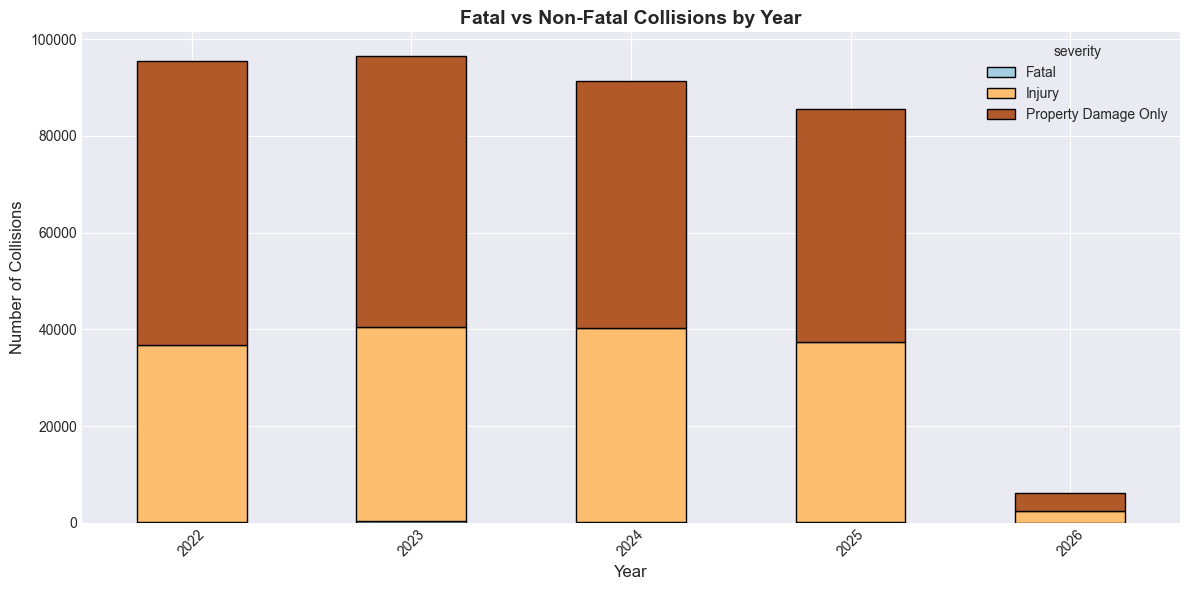

In [37]:
#Cell 29: Analyzing how Fatal and non-fatal collisions change by year (trying to see if any significance in betterment)
# Group by year and severity
year_severity = pd.crosstab(df['year'], df['severity'])

# Plot stacked bar chart
year_severity.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Paired', edgecolor='black')
plt.title('Fatal vs Non-Fatal Collisions by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Collisions', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [41]:
#Cell 30: Killed to Injured ratio by Vehicle type across NYC
# Flatten vehicle type columns
vehicle_cols = [f'VEHICLE TYPE CODE {i}' for i in range(1,6)]
all_vehicles = pd.Series(df[vehicle_cols].values.ravel()).dropna()

# Top 10 vehicle types
top_vehicles = all_vehicles.value_counts().head(10).index

# Compute injuries and fatalities per top vehicle type
injury_cols = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']
injury_fatal_vehicle = {}

for v in top_vehicles:
    subset = df[df[vehicle_cols].apply(lambda x: v in x.values, axis=1)]
    injury_fatal_vehicle[v] = subset[injury_cols].sum()

injury_fatal_vehicle_df = pd.DataFrame(injury_fatal_vehicle).T
injury_fatal_vehicle_df.columns = ['Injured', 'Killed']

# Compute ratio Killed / Injured
injury_fatal_vehicle_df['Killed_to_Injured_Ratio'] = (injury_fatal_vehicle_df['Killed'] / injury_fatal_vehicle_df['Injured']).replace(np.inf, np.nan).round(4)

# Display results
injury_fatal_vehicle_df


,Injured,Killed,Killed_to_Injured_Ratio
Sedan,122208,402,0.0033
Station Wagon/Sport Utility Vehicle,98327,431,0.0044
Bike,19052,64,0.0034
Pick-up Truck,8359,60,0.0072
Taxi,10515,27,0.0026
Box Truck,5896,53,0.0090
Bus,6998,37,0.0053
E-Bike,7372,66,0.0090
Motorcycle,6199,161,0.0260
Moped,5453,28,0.0051
